In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pywt
import math
import scipy.fftpack as fftpack

# Question #2

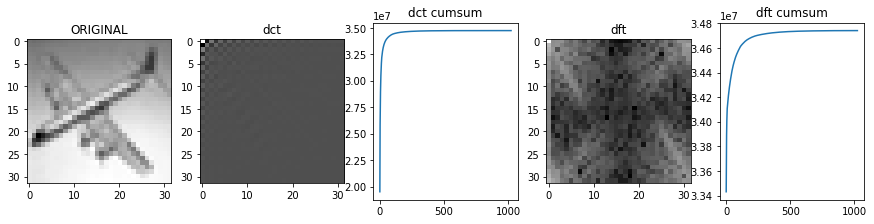

In [7]:
j=1
for i in ['/content/gdrive/MyDrive/1.bmp']:
    # read images
    img=cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    # plot grayscale images
    plt.figure(figsize=(15,15))
    plt.subplot(4,5,j),plt.imshow(img,cmap='gray'),plt.title('ORIGINAL')

    # Calcolate DCT transform images
    img3=fftpack.dctn(img, type=3, shape=None, axes=None, norm='ortho', overwrite_x=False)
    # Plot DCT transform
    plt.subplot(4,5,j+1),plt.imshow(img3,cmap='gray'),plt.title('dct')
    # Flat DCT transform 
    img3=np.ravel(img3)
    # Absolute Flat DCT transform 
    img3=np.abs(img3)
    # Sort 
    img3[::-1].sort()
    # Power two
    img3=np.power(img3, 2)
    # Cumulative
    csdct=np.cumsum(img3)
    # Plot Cumulative
    plt.subplot(4,5,j+2),plt.plot(csdct),plt.title('dct cumsum')

    # Calcolate DFT transform images
    dft = np.fft.fft2(img,norm='ortho')
    dft= np.abs(dft)
    #dft= np.log(np.abs(dft))
    # Plot DFT transform
    plt.subplot(4,5,j+3),plt.imshow(np.log(dft),cmap='gray'),plt.title('dft')
    # Flat DFT transform 
    dft=np.ravel(dft)
    # Absolute Flat DFT transform 
    dft=np.abs(dft)
    # Sort 
    dft[::-1].sort()
    # Power two
    dft=np.power(dft, 2)
    # Cumulative
    csdft=np.cumsum(dft)
    # Plot Cumulative
    plt.subplot(4,5,j+4),plt.plot(csdft),plt.title('dft cumsum')
    j+=5

##### As you can see, the growth of DCT coefficients is faster, which means that it includes coefficients with large values and small values, which is suitable for compression.

# Question #3

In [8]:
def lowpass_idealFilter(D0,shape):
    Filter = np.zeros((shape[0],shape[1]))
    center = (0,0)
    for x in range(shape[1]):
        for y in range(shape[0]):
            if math.sqrt((y-center[0])**2 + (x-center[1])**2) < D0:
                Filter[y,x] = 1
    return Filter

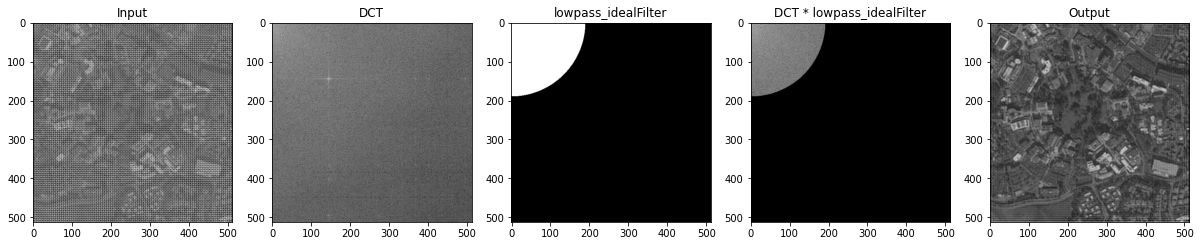

In [10]:
import scipy.fftpack as fftpack
img = cv2.imread('/content/gdrive/MyDrive/2.jpg',0)
plt.figure(figsize=(25, 25))
plt.subplot(161), plt.imshow(img,cmap='gray'), plt.title("Input")
original=fftpack.dctn(img)



plt.subplot(162), plt.imshow(np.log(1+np.abs(original)), "gray"), plt.title("DCT")

lowpass =  lowpass_idealFilter(190,img.shape)
plt.subplot(163), plt.imshow(np.abs(lowpass), "gray"), plt.title("lowpass_idealFilter")

DCT_m_lowpass_idealFilter = original * lowpass_idealFilter(190,img.shape)
plt.subplot(164), plt.imshow(np.log(1+np.abs(DCT_m_lowpass_idealFilter)), "gray"), plt.title("DCT * lowpass_idealFilter")

inverse = fftpack.idctn(DCT_m_lowpass_idealFilter)
plt.subplot(165), plt.imshow(np.abs(inverse), "gray"), plt.title("Output")


plt.show()

# Question #4

#### Q4-A

In [11]:
def psnr(img, ref):
    #convert imput images to int
    _img = np.float64(np.copy(img))
    _ref = np.float64(np.copy(ref))
    mse = np.mean((_img - _ref) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 10 * math.log10((PIXEL_MAX)**2 / math.sqrt(mse))

Before wavelet: 32.82950232657831
After wavelet: 34.71766562190653


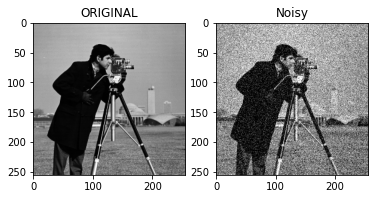

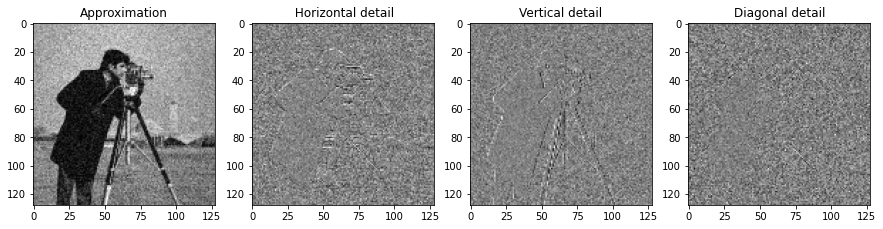

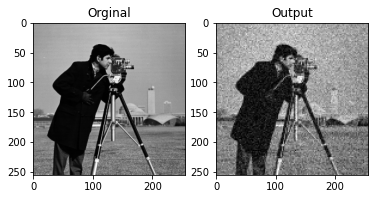

In [39]:
num=1

Original=cv2.imread('/content/gdrive/MyDrive/4.bmp',cv2.IMREAD_GRAYSCALE)
titles = ['Approximation', ' Horizontal detail','Vertical detail', 'Diagonal detail']
for i in ['/content/gdrive/MyDrive/3.bmp']:
    # read images
    img=cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    print('Before wavelet:',psnr(Original,img))

    plt.subplot(1,2,1),plt.imshow(Original, cmap=plt.cm.gray),plt.title('ORIGINAL')
    plt.subplot(1,2,2),plt.imshow(img, cmap=plt.cm.gray),plt.title('Noisy')

    LHarray=[]
    HLarray=[]
    HHarray=[]
    for k in range(num):
        coeffs2 = pywt.dwt2(img, 'haar')
        LL, (LH, HL, HH) = coeffs2
        plt.figure(figsize=(15,15))
        
        for n, a in enumerate([LL, LH, HL, HH]):
            plt.subplot(1,4,n+1),plt.imshow(a, cmap=plt.cm.gray),plt.title(titles[n])
        
        img=LL
        LHarray.append(LH)
        HLarray.append(HL)
        HHarray.append(HH)

    for o in range(num-1,-1,-1): 
        s=np.zeros([HHarray[o].shape[0], HHarray[o].shape[1]])
        a=(img, (s, s,s))
        a=pywt.idwt2(a, 'haar')

        img=a
    plt.figure()
    plt.subplot(1,2,1),plt.imshow(Original, cmap=plt.cm.gray),plt.title('Orginal')
    plt.subplot(1,2,2),plt.imshow(img, cmap=plt.cm.gray),plt.title('Output')
    print('After wavelet:' ,psnr(Original,img))

#### Q4_B

In [57]:
def thresh(H,HH):
    H=cv2.medianBlur(np.float32(H),3)
    ABS=np.abs(HH)
    sigma2=(np.median(ABS)/0.6745)**2
    sigma=np.sqrt((np.sum((H-np.mean(H))**2))/H.shape[0]*H.shape[1])
    threshold=sigma2/sigma
    H = (np.abs(H) >= threshold) * H
    H[np.abs(H) < threshold] = 0
    return H

Before wavelet: 32.82950232657831
After wavelet: 34.18767107300374


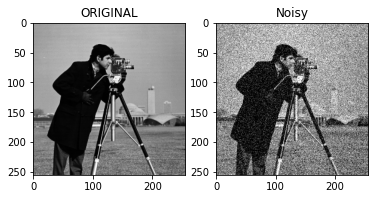

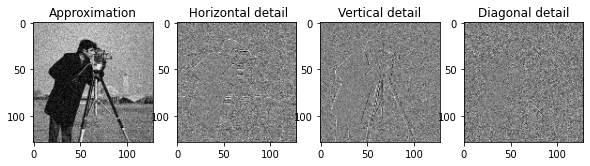

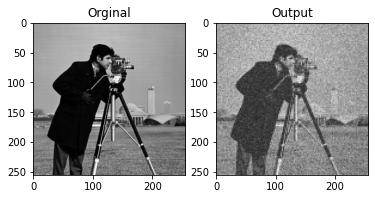

In [58]:
num=1

Original=cv2.imread('/content/gdrive/MyDrive/4.bmp',cv2.IMREAD_GRAYSCALE)
titles = ['Approximation', ' Horizontal detail','Vertical detail', 'Diagonal detail']
for i in ['/content/gdrive/MyDrive/3.bmp']:
    # read images
    img=cv2.imread(i,cv2.IMREAD_GRAYSCALE)
    print('Before wavelet:',psnr(Original,img))

    plt.subplot(1,2,1),plt.imshow(Original, cmap=plt.cm.gray),plt.title('ORIGINAL')
    plt.subplot(1,2,2),plt.imshow(img, cmap=plt.cm.gray),plt.title('Noisy')

    LHarray=[]
    HLarray=[]
    HHarray=[]
    for k in range(num):
        coeffs2 = pywt.dwt2(img, 'haar')
        LL, (LH, HL, HH) = coeffs2
        plt.figure(figsize=(15,15))

        
        for n, a in enumerate([LL, LH, HL, HH]):
            plt.subplot(1,6,n+1),plt.imshow(a, cmap=plt.cm.gray),plt.title(titles[n])
        
        img=LL
        LHarray.append(LH)
        HLarray.append(HL)
        HHarray.append(HH)

    for o in range(num-1,-1,-1): 
        HH=thresh(HHarray[o],HHarray[o])
        LH=thresh(LHarray[o],HHarray[o])
        HL=thresh(HLarray[o],HHarray[o])
        a=(img,  (LH, HL,HH))
        a=pywt.idwt2(a, 'haar')

        img=a
    plt.figure()
    plt.subplot(1,2,1),plt.imshow(Original, cmap=plt.cm.gray),plt.title('Orginal')
    plt.subplot(1,2,2),plt.imshow(img, cmap=plt.cm.gray),plt.title('Output')
    print('After wavelet:' ,psnr(Original,img))

